<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [119]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [87]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


c:\Users\dan_r\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


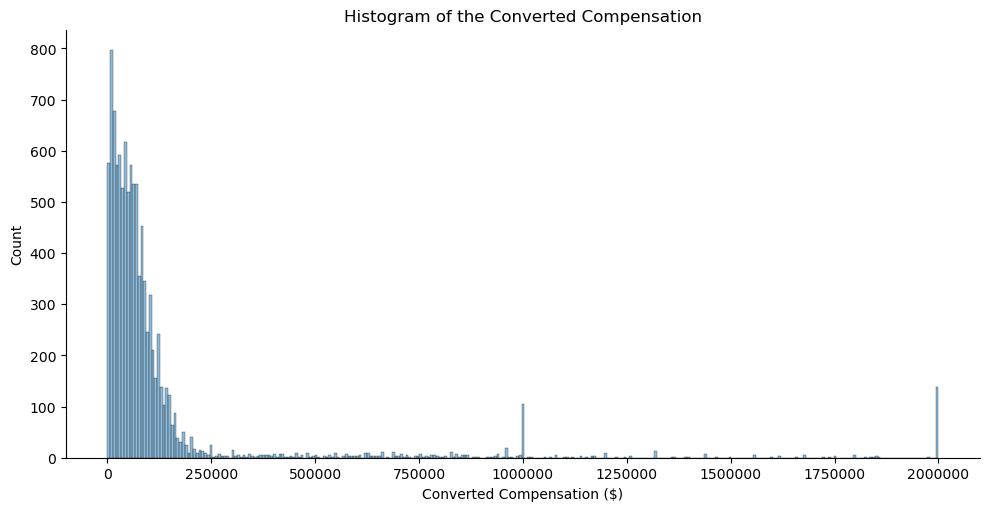

In [33]:
# your code goes here
QUERY = '''
SELECT ConvertedComp FROM master'''

df = pd.read_sql_query(QUERY,conn)

ax = sns.displot(df,kind='hist', legend=None, aspect=2)
plt.ticklabel_format(scilimits=(0,10))
plt.xlabel('Converted Compensation ($)')
plt.title('Histogram of the Converted Compensation')
plt.show()


array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

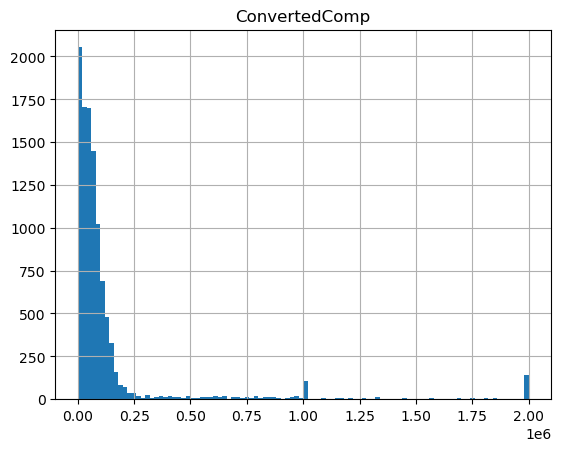

In [53]:
QUERY = '''
SELECT ConvertedComp FROM master'''

df = pd.read_sql_query(QUERY,conn)
df.hist(bins=100)

### Box Plots


Plot a box plot of `Age.`


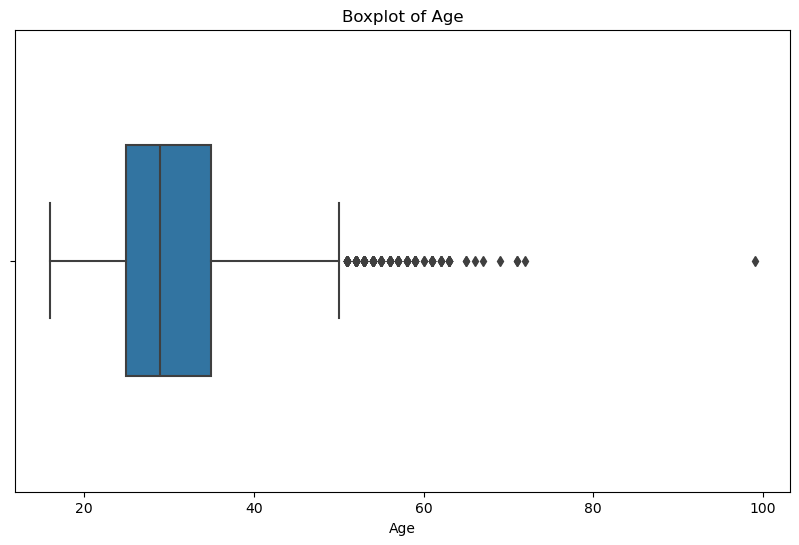

In [44]:
# your code goes here

QUERY = '''
SELECT Age
FROM master'''

df= pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,6))
ax = sns.boxplot(df, x='Age',width= .5)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


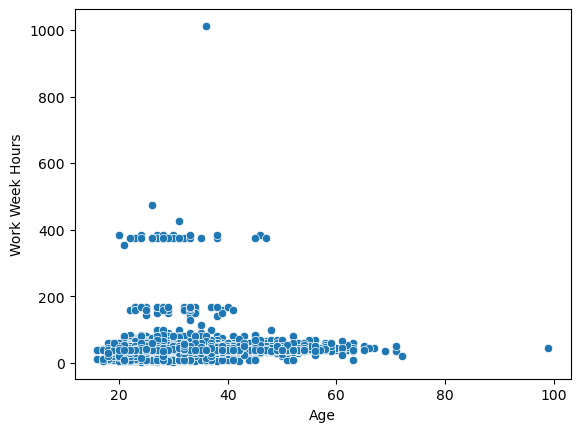

In [49]:
# your code goes here
QUERY = '''
SELECT Age, WorkWeekHrs
FROM master'''

df = pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df,x='Age',y='WorkWeekHrs')
plt.ylabel('Work Week Hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

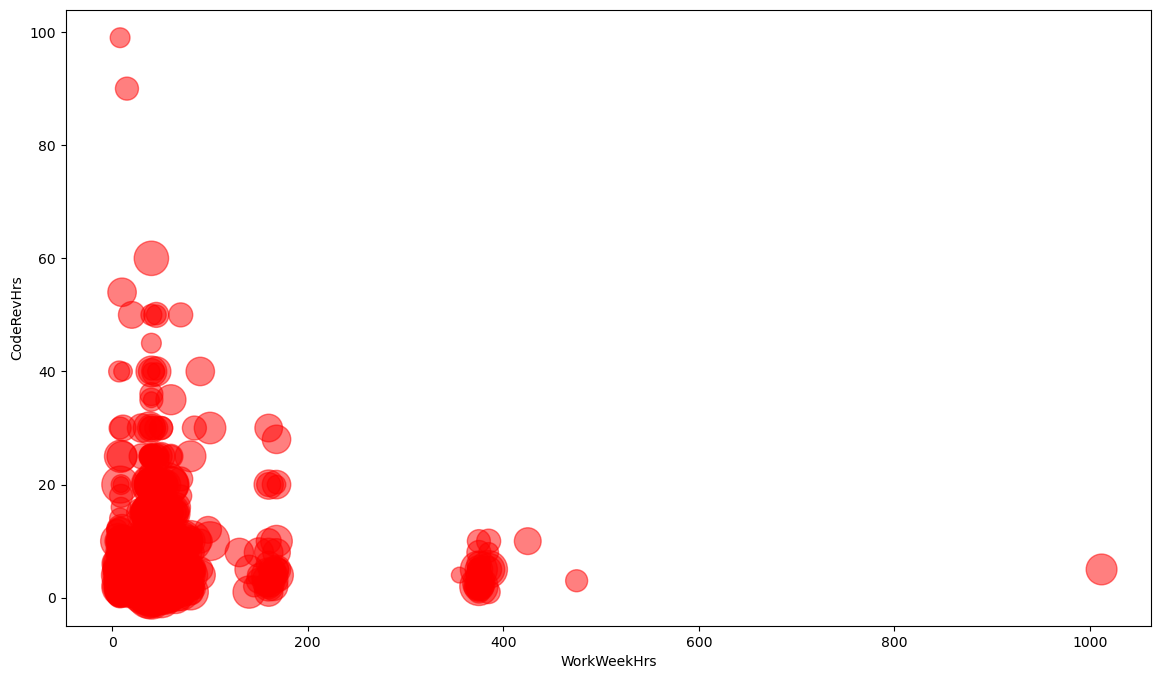

In [61]:
# your code goes here
QUERY = '''
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master'''

df = pd.read_sql_query(QUERY,conn)

df = df.dropna() # Drop the rows where at least one element is missing7

#For bubble graphs we need to normalise the data
#We will use 'Feature Scaling' for this example
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

df.plot(kind='scatter',
        x='WorkWeekHrs',
        y='CodeRevHrs',
        alpha = 0.5,
        figsize=(14,8),
        color='red',
        s=norm_age*2000 + 10)


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


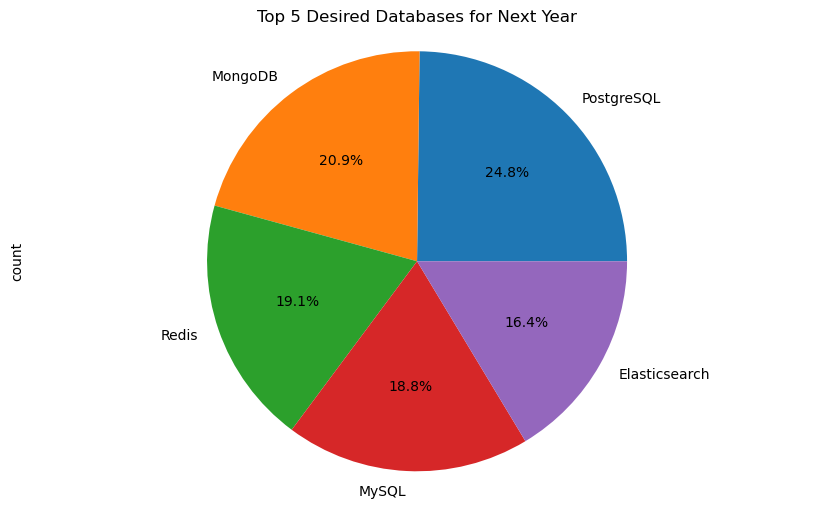

In [38]:
# your code goes here
QUERY = '''
SELECT DatabaseDesireNextYear
FROM DatabaseDesireNextYear'''

df = pd.read_sql_query(QUERY,conn)

df_grouped = pd.DataFrame(df.groupby('DatabaseDesireNextYear').value_counts())
df_top5 = df_grouped.sort_values(by = ['count'],ascending=False).head()

df_top5['count'].plot(kind='pie',
                         figsize=(10,6),
                         autopct = '%1.1f%%',
                )

plt.title('Top 5 Desired Databases for Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()


                        count
LanguageDesireNextYear       
JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088


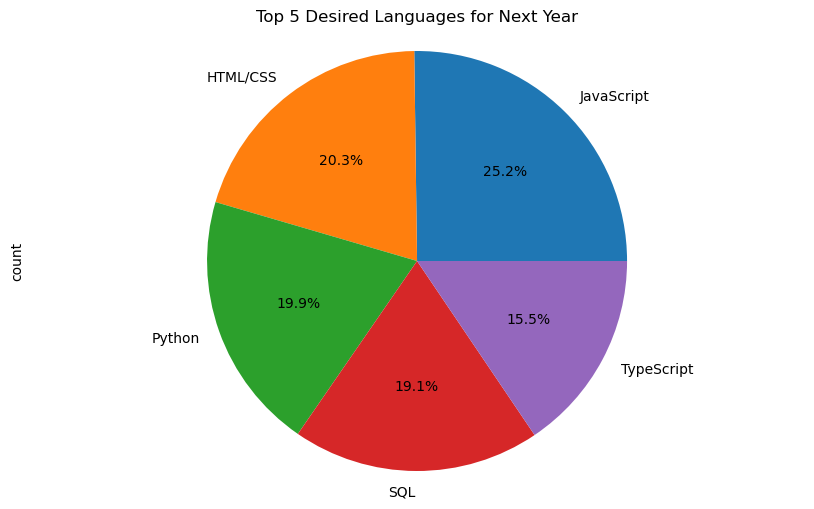

In [122]:
QUERY = '''
SELECT LanguageDesireNextYear
FROM LanguageDesireNextYear'''

df = pd.read_sql_query(QUERY,conn)

df_grouped = pd.DataFrame(df.groupby('LanguageDesireNextYear').value_counts())
df_top5 = df_grouped.sort_values(by = ['count'],ascending=False).head()

print(df_top5)

df_top5['count'].plot(kind='pie',
                         figsize=(10,6),
                         autopct = '%1.1f%%',
                )

plt.title('Top 5 Desired Languages for Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

                       count
LanguageWorkedWith          
JavaScript              8687
HTML/CSS                7830
SQL                     7106
Bash/Shell/PowerShell   4642
Python                  4542


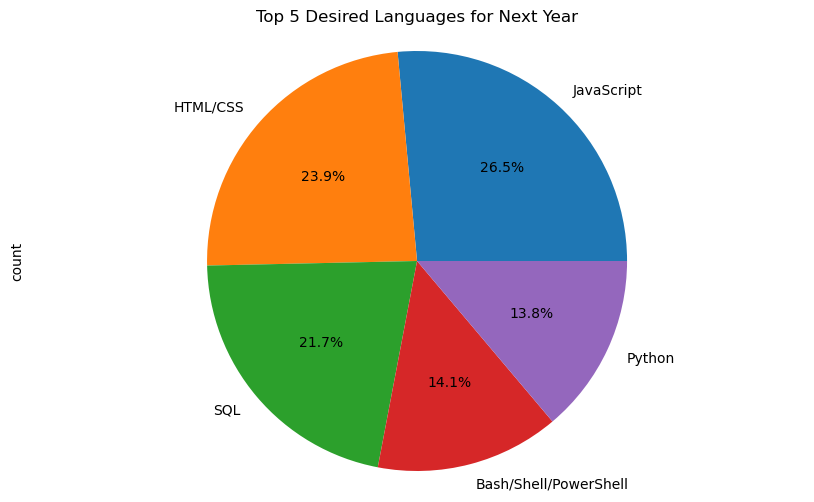

In [123]:
QUERY = '''
SELECT LanguageWorkedWith
FROM LanguageWorkedWith'''

df = pd.read_sql_query(QUERY,conn)

df_grouped = pd.DataFrame(df.groupby('LanguageWorkedWith').value_counts())
df_top5 = df_grouped.sort_values(by = ['count'],ascending=False).head()

print(df_top5)

df_top5['count'].plot(kind='pie',
                         figsize=(10,6),
                         autopct = '%1.1f%%',
                )

plt.title('Top 5 Desired Languages for Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

In [137]:
QUERY = '''
SELECT DatabaseWorkedWith, COUNT(Respondent)
FROM DatabaseWorkedWith
GROUP BY Respondent HAVING  COUNT(DatabaseWorkedWith)=1 AND DatabaseWorkedWith = 'MySQL'
'''

df = pd.read_sql_query(QUERY,conn)

df.count()

DatabaseWorkedWith    474
COUNT(Respondent)     474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


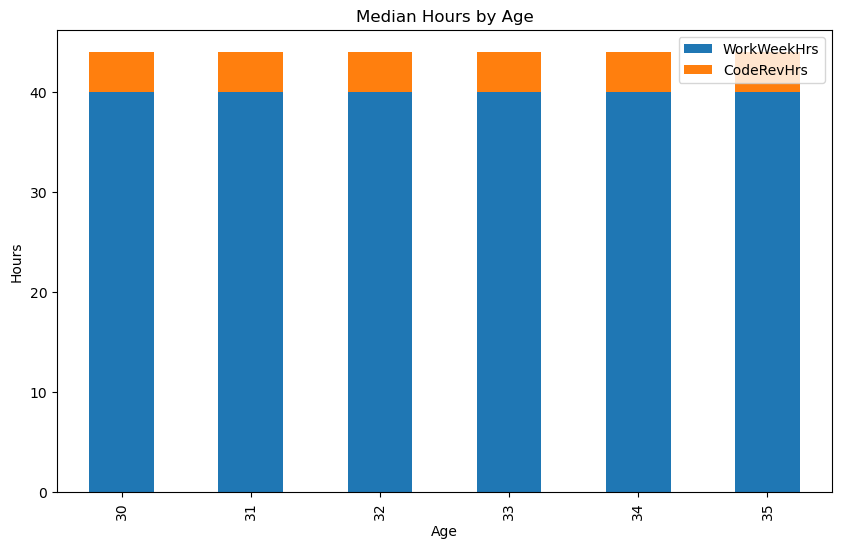

In [71]:
# your code goes here
QUERY = '''
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >= 30 AND Age <=35'''

df=pd.read_sql_query(QUERY,conn)

df['Age'] = df['Age'].astype(int)
df.set_index('Age',inplace=True)

#Used this code to orignally check what the median was for each age. They are all identical
#for ag in [30,31,32,33,34,35]:
 #   print(df[df.index == ag].median())

df_grouped = df.groupby('Age')[['WorkWeekHrs','CodeRevHrs']].median()



df_grouped.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Hours') # add y-label to the plot
plt.title('Median Hours by Age') # add title to the plot

plt.show()




## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


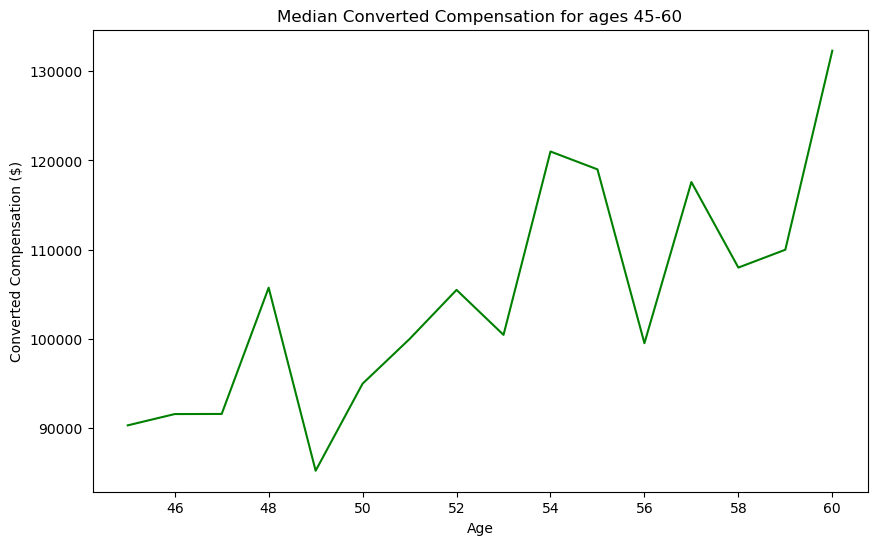

In [86]:
# your code goes here
QUERY = '''
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 45 AND Age <=60'''

df=pd.read_sql_query(QUERY,conn)

df['Age'] = df['Age'].astype(int) # Convert to int to make displaying data easier
df.dropna() # Drop empty rows 
df_grouped = df.groupby('Age').median()

df_grouped.plot(kind='line',
                figsize=(10,6),
                legend=None,
                color='green')
plt.title('Median Converted Compensation for ages 45-60')
plt.ylabel('Converted Compensation ($)')
plt.show()


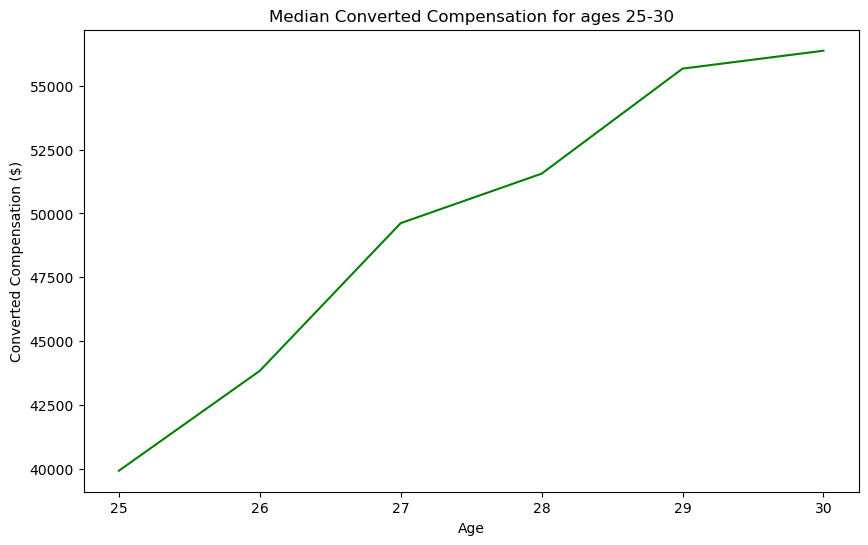

In [145]:
# your code goes here
QUERY = '''
SELECT Age, ConvertedComp
FROM master
WHERE Age >= 25 AND Age <=30'''

df=pd.read_sql_query(QUERY,conn)

df['Age'] = df['Age'].astype(int) # Convert to int to make displaying data easier
df.dropna() # Drop empty rows 
df_grouped = df.groupby('Age').median()

df_grouped.plot(kind='line',
                figsize=(10,6),
                legend=None,
                color='green')
plt.title('Median Converted Compensation for ages 25-30')
plt.ylabel('Converted Compensation ($)')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [104]:
# your code goes here
QUERY = '''
SELECT MainBranch
FROM master '''

df=pd.read_sql_query(QUERY,conn)

df1 = pd.DataFrame(df.groupby('MainBranch').value_counts())


Text(0.5, 0, 'Number of Respondents')

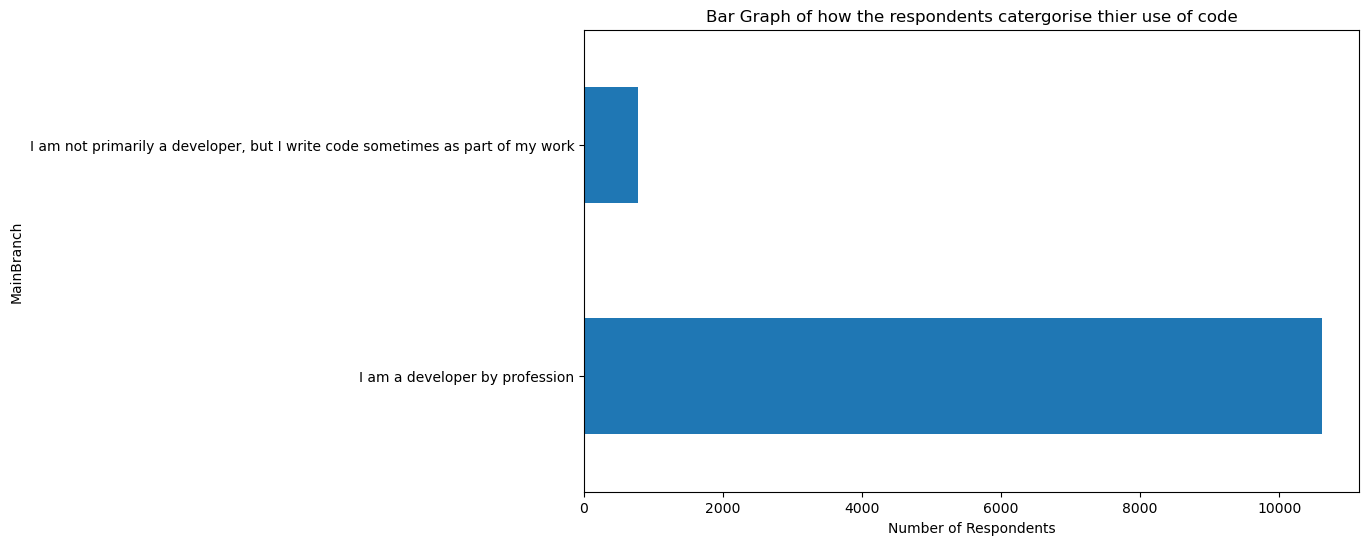

In [116]:
df1.plot(kind='barh',
         figsize = (10,6),
         legend = None,
         )
plt.title('Bar Graph of how the respondents catergorise thier use of code')
plt.xlabel('Number of Respondents')

In [144]:
QUERY = '''
SELECT DevType, Count(Respondent)
FROM DevType
GROUP BY Respondent HAVING  COUNT(DevType)=1 '''

df=pd.read_sql_query(QUERY,conn)
df.value_counts()

DevType                                        Count(Respondent)
Developer, full-stack                          1                    1472
Developer, back-end                            1                     752
Developer, front-end                           1                     292
Developer, mobile                              1                     245
Developer, desktop or enterprise applications  1                     129
Data scientist or machine learning specialist  1                      61
Developer, QA or test                          1                      57
DevOps specialist                              1                      42
Engineer, data                                 1                      36
Data or business analyst                       1                      35
Developer, embedded applications or devices    1                      26
System administrator                           1                      25
Engineering manager                            1           

Close the database connection.


In [117]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
